# Spotify

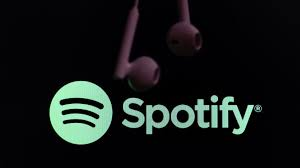

Spotify is one of the popular platforms where you can listen your favourite songs , podcasts and playlists . Being a spotify lover myself, today i am gonna do some analysis on its songs :) Hope ya all like it :)

## This file is based on previous file so the concept is same but in this file i have used a widget system to select a particular song from the songs with same name with the help of artists :)

# Importing The Packages

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import plotly
from sklearn.preprocessing import StandardScaler
from scipy.spatial import distance
import copy
from IPython.display import display
import warnings
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
warnings.filterwarnings("ignore")
plotly.offline.init_notebook_mode (connected = True)

# Importing The Data

In [ ]:
data=pd.read_csv('../input/spotify-dataset-19212020-160k-tracks/data.csv')

# First Look At The Data

In [ ]:
data.head()

# Removing the unnecessary data

In [ ]:
data.drop(columns=['id','release_date'],inplace=True)

# Standardize the data

In [ ]:
x=data[data.drop(columns=['artists','name']).columns].values
scaler =StandardScaler().fit(x)
X_scaled = scaler.transform(x)
data[data.drop(columns=['artists','name']).columns]=X_scaled

In [ ]:
data.sort_values('tempo',inplace=True)

# Function To Find The Relevant Song :)

In [ ]:
def find_word(word,df,number=10):
    df.drop_duplicates(inplace=True)
    words=df['name'].values
    artists=df['artists'].values
    t=[]
    count=0
    if word[-1]==' ':
        word=word[:-1]
    for i in words:
        if word.lower() in i.lower():
            t.append([len(word)/len(i),count])
        else:
            t.append([0,count])
        count+=1
    t.sort(reverse=True)
    s=[[words[t[i][1]],artists[t[i][1]].strip('][').split(', ')] for i in range(number)]   
    songs=[words[t[i][1]] for i in range(number)]
    artist=[artists[t[i][1]] for i in range(number)]
    x=[]
    for i in s:
        l=''
        by=''
        for j in i[1]:
            by+=j
        l+=i[0]+' by '+by
        x.append(l)
    tup=[]
    for i in range(number):
        tup.append((x[i],i))

    
    return tup,songs,artist
    


# Recommendation System Using Cosine Similarity 

In [ ]:
def make_matrix_cosine(df,best,number,artist):
    df.drop_duplicates(inplace=True)
    x=df[(df['name']==best) & (df['artists']==artist)].drop(columns=['name','artists']).values
    artist=artist.replace("'","").replace("'","").replace('[','').replace(']','')
    if ',' in artist:
        inm = artist.rfind(",")
        artist=artist[:inm]+' and'+artist[inm+1:]
    print('The song closest to your search is :',best,' by ',artist)
    

    song_names=df['name'].values
#    df=df.fillna(df.mean())
    p=[]
    count=0
    for i in df.drop(columns=['artists','name']).values:
        p.append([distance.cosine(x,i),count])
        count+=1
    p.sort()
    for i in range(1,number+1):
        artists=data['artists'].values
        artist=artists[p[i][1]]
        artist=artist.replace("'","").replace("'","").replace('[','').replace(']','')
        if ',' in artist:
            inm = artist.rfind(",")
            artist=artist[:inm]+' and'+artist[inm+1:]
        print(song_names[p[i][1]],'by',artist)
    

In [ ]:
a=input('Please enter The name of the song :')
b=int(input('Please enter the number of recommendations you want: '))
tup,s,ar=find_word(a,data)
ans=widgets.Dropdown(
    options=tup,
    description='Closest Songs To '+a,
    disabled=False,
)
display(ans)

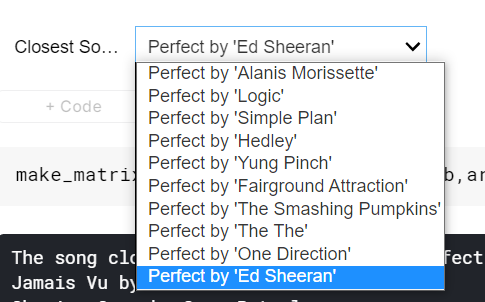

In [ ]:
make_matrix_cosine(data,s[ans.value],b,ar[ans.value])

# Function To Calculate Euclidean Distance And Make A Matrix

In [ ]:
def make_matrix(df,best,number,artist):
    df.drop_duplicates(subset=['artists','name'],inplace=True)
    x=df[(df['name']==best) & (df['artists']==artist)].drop(columns=['name','artists']).values
    artist=artist.replace("'","").replace("'","").replace('[','').replace(']','')
    if ',' in artist:
        inm = artist.rfind(",")
        artist=artist[:inm]+' and'+artist[inm+1:]
    print('The song closest to your search is :',best,' by ',artist)
    

    song_names=df['name'].values
#    df=df.fillna(df.mean())
    p=[]
    count=0
    for i in df.drop(columns=['artists','name']).values:
        p.append([distance.euclidean(x,i),count])
        count+=1
    p.sort()
    for i in range(1,number+1):
        artists=data['artists'].values
        artist=artists[p[i][1]]
        artist=artist.replace("'","").replace("'","").replace('[','').replace(']','')
        if ',' in artist:
            inm = artist.rfind(",")
            artist=artist[:inm]+' and'+artist[inm+1:]
        print(song_names[p[i][1]],'by',artist)
    

In [ ]:
a=input('Please enter The name of the song :')
b=int(input('Please enter the number of recommendations you want: '))
tup,s,ar=find_word(a,data)
ans=widgets.Dropdown(
    options=tup,
    description='Closest Songs To '+a,
    disabled=False,
)
display(ans)

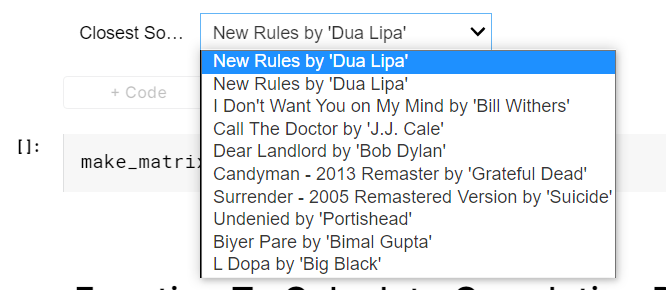

In [ ]:
make_matrix(data,s[ans.value],b,ar[ans.value])

# Function To Calculate Correlation Distance And Make A Matrix

In [ ]:
def make_matrix_correlation(df,best,number,artist):
    df.drop_duplicates(subset=['artists','name'],inplace=True)
    x=df[(df['name']==best) & (df['artists']==artist)].drop(columns=['name','artists']).values
    artist=artist.replace("'","").replace("'","").replace('[','').replace(']','')
    if ',' in artist:
        inm = artist.rfind(",")
        artist=artist[:inm]+' and'+artist[inm+1:]
    print('The song closest to your search is :',best,' by ',artist)
    

    song_names=df['name'].values
#    df=df.fillna(df.mean())
    p=[]
    count=0
    for i in df.drop(columns=['artists','name']).values:
        p.append([distance.correlation(x,i),count])
        count+=1
    p.sort()
    for i in range(1,number+1):
        artists=data['artists'].values
        artist=artists[p[i][1]]
        artist=artist.replace("'","").replace("'","").replace('[','').replace(']','')
        if ',' in artist:
            inm = artist.rfind(",")
            artist=artist[:inm]+' and'+artist[inm+1:]
        print(song_names[p[i][1]],'by',artist)
    

In [ ]:
a=input('Please enter The name of the song :')
b=int(input('Please enter the number of recommendations you want: '))
tup,s,ar=find_word(a,data)
ans=widgets.Dropdown(
    options=tup,
    description='Closest Songs To '+a,
    disabled=False,
)
display(ans)

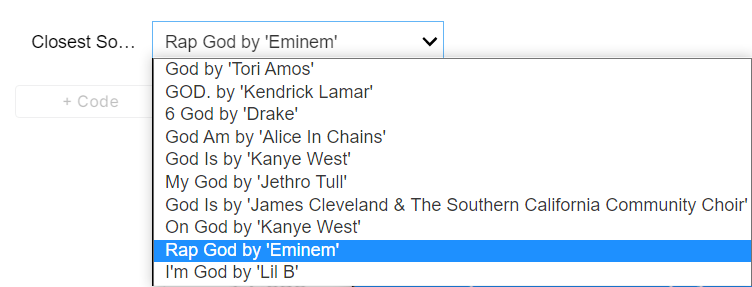

In [ ]:
make_matrix_correlation(data,s[ans.value],b,ar[ans.value])

# Guys the widgets will work on edit mode :(  I have still put the ss to show a glimpse of the widget :)

# Hope you liked the file :)

# Thank you :)

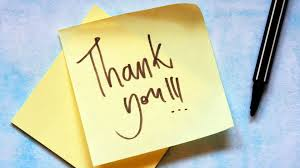